In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import shutil
from tensorflow import keras
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow
from matplotlib import pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Flatten, Dense, Conv2D, MaxPooling2D, MaxPool2D, concatenate, BatchNormalization, Dropout, AveragePooling2D
from tensorflow.keras.activations import relu, sigmoid, softmax
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.utils import plot_model, save_img
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.metrics import CategoricalCrossentropy
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy,MeanSquaredError,MeanAbsoluteError
from tqdm import tqdm
from glob import glob
import random


In [ ]:
#source root directory and distination root directory
train_src = "/content/drive/MyDrive/Affectnet/train_class/"

val_src = "/content/drive/MyDrive/Affectnet/val_class/"
test_src="/content/drive/MyDrive/Affectnet/test_classs/"

In [ ]:
train_datagen = tensorflow.keras.preprocessing.image.ImageDataGenerator(
      #rescale=1./255, 
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
    
      )

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_src,
        target_size=(224,224 ),
        batch_size=64,
        class_mode='categorical',
        shuffle=True
        )

Found 16057 images belonging to 4 classes.


In [ ]:
# To validate the training process, we do not need augmented images.
validation_datagen = tensorflow.keras.preprocessing.image.ImageDataGenerator(
        #rescale=1./255
        )

validation_generator = validation_datagen.flow_from_directory(
        val_src,
        target_size=(224, 224),
        batch_size=64,
        class_mode='categorical',
        shuffle=True
        )

Found 2009 images belonging to 4 classes.


In [ ]:
conv_base = tensorflow.keras.applications.EfficientNetB3(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3),
                  pooling='max'
                  )
conv_base.summary()

43950080/43941136 [==============================] - 0s 0us/step
Model: "efficientnetb3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 stem_conv_pad (Zero

In [ ]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False


In [ ]:
for layer in conv_base.layers:
  layer.trainable = True

In [ ]:
# An empyty model is created.
model = tensorflow.keras.models.Sequential()

# VGG16 is added as convolutional layer.
model.add(conv_base)

# Layers are converted from matrices to a vector.

#model.add(tensorflow.keras.layers.Flatten())

# Our neural layer is added.
#model.add(tensorflow.keras.layers.Dropout(0.5))
#model.add(tensorflow.keras.layers.Dense(256, activation='relu'))

model.add(tensorflow.keras.layers.Dense(4, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=tensorflow.keras.optimizers.Adam(lr=.001),
              metrics=['acc'])

# Showing the created model.
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb3 (Functional)  (None, 1536)             10783535  
                                                                 
 dense_1 (Dense)             (None, 4)                 6148      
                                                                 
Total params: 10,789,683
Trainable params: 6,148
Non-trainable params: 10,783,535
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
rlronp=tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",factor=0.5,
                                            patience=1, verbose=1)

In [ ]:
estop=tf.keras.callbacks.EarlyStopping( monitor="val_loss", patience=4, verbose=1,
                                        restore_best_weights=True)

In [ ]:
history = model.fit_generator(
      train_generator,
      epochs=50,
      validation_data=validation_generator,
      workers=8,
      validation_steps=32,
      callbacks=[rlronp,estop]
      )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/50
251/251 [==============================] - 897s 3s/step - loss: 1.8398 - acc: 0.3488 - val_loss: 1.5203 - val_acc: 0.4107 - lr: 0.0010
Epoch 2/50
251/251 [==============================] - 843s 3s/step - loss: 1.4298 - acc: 0.4356 - val_loss: 1.3623 - val_acc: 0.4380 - lr: 0.0010
Epoch 3/50
251/251 [==============================] - ETA: 0s - loss: 1.3481 - acc: 0.4589
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
251/251 [==============================] - 841s 3s/step - loss: 1.3481 - acc: 0.4589 - val_loss: 1.4209 - val_acc: 0.4460 - lr: 0.0010
Epoch 4/50
251/251 [==============================] - 841s 3s/step - loss: 1.2227 - acc: 0.4901 - val_loss: 1.2594 - val_acc: 0.4654 - lr: 5.0000e-04
Epoch 5/50
251/251 [==============================] - ETA: 0s - loss: 1.2314 - acc: 0.4867
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
251/251 [==============================] - 841s 3s/step - loss: 1.2314 - acc: 0.4867 - va

KeyboardInterrupt: ignored

In [ ]:
model.save('/content/drive/MyDrive/Models/affectnet_efficient-73.h5')


In [ ]:
myModel = keras.models.load_model('/content/drive/MyDrive/Models/affectnet_efficient-73.h5')


In [ ]:
# To test the trained model, we do not need augmented images.
test_datagen = tensorflow.keras.preprocessing.image.ImageDataGenerator(
       #rescale=1./255
        )

test_generator = test_datagen.flow_from_directory(
        test_src,
        target_size=(224, 224),
        batch_size=64,
        )

# Printing the test results.
test_loss, test_acc = model.evaluate_generator(test_generator, steps=30)
print('test acc:', test_acc)

Found 4000 images belonging to 4 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  del sys.path[0]


ValueError: ignored

In [ ]:
#Plot the loss curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=1)
plt.show()

#Plot the Accuracy Curves
plt.figure(figsize=[8,6]) 
plt.plot(history.history['acc'],'r',linewidth=3.0) 
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16) 
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)
plt.show()

NameError: ignored

<Figure size 576x432 with 0 Axes>

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
img=image.load_img("/content/drive/MyDrive/Affectnet/test_classs/class003/image0000481.jpg",target_size=(224,224))
x=image.img_to_array(img)

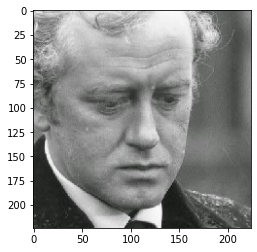

In [ ]:
plt.imshow(img)

In [ ]:
#x=x/255
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)

preds=myModel.predict(x)
print(preds)
preds=np.argmax(preds,axis=1)
print(preds)
if preds==0:
  preds="Neutral"
elif(preds==1):
  preds="Happy"
elif(preds==2):
  preds="Sad"  
elif(preds==3):
  preds="Energetic"

print(preds) 


[[0.17059033 0.00341582 0.7675781  0.05841569]]
[2]
Sad
